In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Lighthouse Labs/Final-Project/notebooks

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Lighthouse Labs/Final-Project/notebooks


In [2]:
!pip install tensorflow streamlit matplot numpy pandas

In [13]:
data_categories = data_train.class_names

In [42]:
data_categories

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

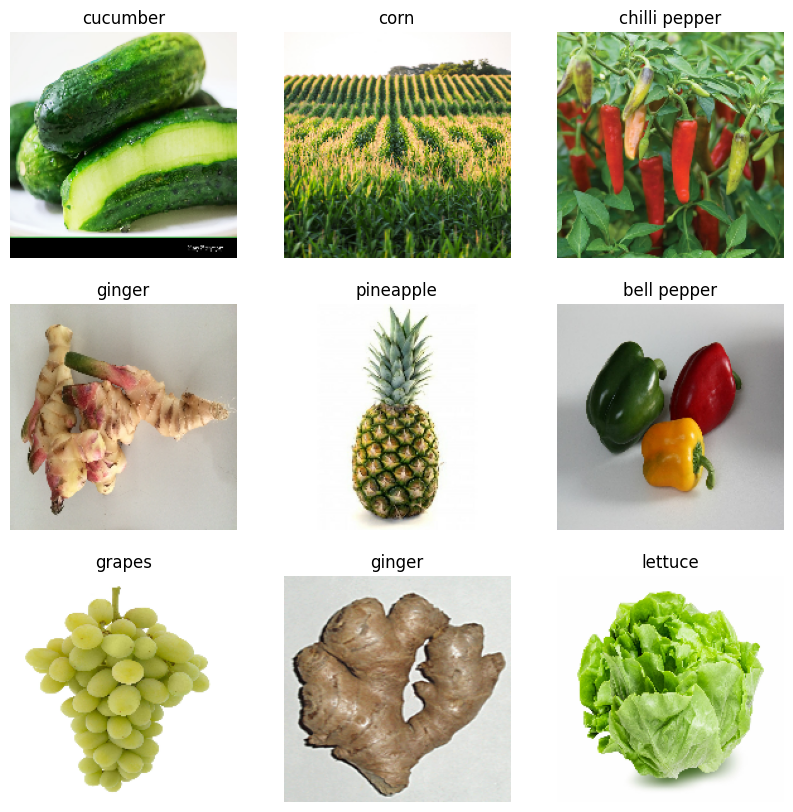

In [15]:
plt.figure(figsize=(10, 10))
for image, label in data_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(data_categories[label[i]])
        plt.axis("off")

In [54]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

img_height = 180
img_width = 180

# Data Augmentation
data_augmentation = Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
])

# Load Data
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    "Fruits_Vegetables/train",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "Fruits_Vegetables/validation",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names

# Use Pretrained Base Model
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False  # freeze for faster training

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names))
])

# Compile
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15
)


Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


<ipython-input-54-59f782f364ee>:33: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.3239 - loss: 2.6146 - val_accuracy: 0.8006 - val_loss: 0.6419
Epoch 2/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.7362 - loss: 0.8594 - val_accuracy: 0.8689 - val_loss: 0.4218
Epoch 3/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.7977 - loss: 0.6527 - val_accuracy: 0.8803 - val_loss: 0.3500
Epoch 4/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.8319 - loss: 0.5222 - val_accuracy: 0.9003 - val_loss: 0.3248
Epoch 5/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.8607 - loss: 0.4479 - val_accuracy: 0.9060 - val_loss: 0.2705
Epoch 6/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.8843 - loss: 0.3621 - val_accuracy: 0.9088 - val_loss: 0.2974
Epoch 7/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.8924 - loss: 0.3260 - val_accuracy: 0.9145 - val_loss: 0.2752
Epoch 8/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy:

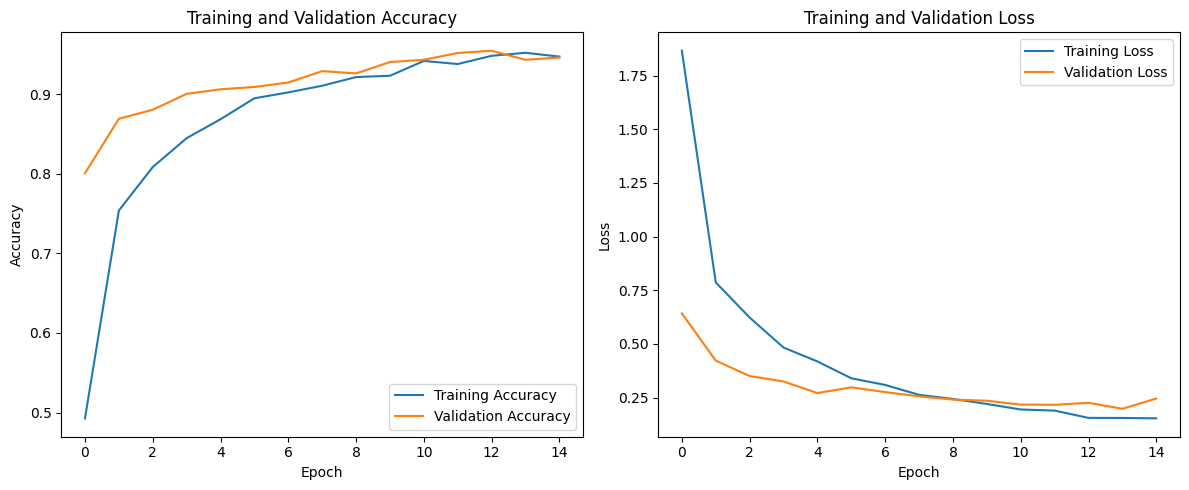

In [59]:
import matplotlib.pyplot as plt

# Plot training/validation accuracy and loss
epochs_range = range(len(history.history['accuracy']))

plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


In [61]:
image = 'pineapple.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr = tf.keras.utils.array_to_img(image)

img_bat = tf.expand_dims(img_arr, 0)

In [62]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [63]:
score = tf.nn.softmax(predict)

In [64]:
print('veg/fruit in image is {} wuth accuracy of {:0.2f}'.format(data_categories[np.argmax(score)], np.max(score)*100))

veg/fruit in image is pineapple wuth accuracy of 100.00


In [66]:
# Make prediction
predict = model.predict(img_bat)
score = tf.nn.softmax(predict[0])  # Convert to probabilities

# Check shape of score to ensure no out-of-bounds error
print("Predicted score:", score)
print("Predicted score shape:", score.shape)

# Ensure the index doesn't go out of range
if len(score) <= len(data_categories):
    predicted_class = data_categories[np.argmax(score)]
    st.write(f"**Prediction:** {predicted_class} with **confidence** {np.max(score) * 100:.2f}%")
else:
    st.write("Prediction error: Model output doesn't match category count.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


2025-04-29 02:16:38.380 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Predicted score: tf.Tensor(
[2.82337309e-09 7.21174009e-10 1.02281215e-08 5.34934042e-11
 5.42215058e-11 1.85948090e-09 2.74189148e-07 4.57463191e-12
 1.14392975e-08 1.28200284e-09 4.39549341e-10 4.72871797e-10
 7.09005077e-11 1.35108769e-09 4.36199876e-08 2.55148264e-10
 9.91354909e-09 8.08541289e-10 7.49541984e-10 1.81661053e-09
 3.23784271e-08 2.30740582e-08 3.03537617e-09 9.67490643e-10
 2.86618351e-09 9.99995947e-01 1.02772935e-06 4.69190553e-08
 2.55781219e-06 1.06893951e-08 1.39861442e-10 1.37869298e-08
 1.29849270e-10 6.75542555e-09 7.54194096e-10 8.43280584e-11], shape=(36,), dtype=float32)
Predicted score shape: (36,)


2025-04-29 02:16:38.545 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-29 02:16:38.547 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-29 02:16:38.550 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-29 02:16:38.551 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [67]:
predicted_class = data_categories[np.argmax(score)]
print(f"Predicted class: {predicted_class}")


Predicted class: pineapple


In [65]:
model.save('WhatIsThisFruit.keras')
